
# <center>EE5180 : Assignment 2
<h4><b><left>Tarang Narendra Mendhe  : EE20B080</b></h4>

# Neural Networks

In [4]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
#importing dataset
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
infrared_thermography_temperature = fetch_ucirepo(id=925) 
  
# data (as pandas dataframes) 
X = infrared_thermography_temperature.data.features 
Y = infrared_thermography_temperature.data.targets 

In [6]:
X

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,...,33.5775,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,...,34.0325,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,...,34.9000,34.8275,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850
3,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,...,34.4400,34.4225,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825
4,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,...,35.0900,35.1600,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,Female,21-25,Asian,25.7,50.8,0.6,1.2225,35.6425,35.6525,34.8575,...,35.1075,35.3475,35.4000,35.1375,35.2750,35.8525,35.7475,36.0675,35.6775,35.7100
1016,Female,21-25,White,25.7,50.8,0.6,1.4675,35.9825,35.7575,35.4275,...,35.3100,35.2175,35.2200,35.2075,35.0700,35.7650,35.5525,36.5000,36.4525,36.4900
1017,Female,18-20,Black or African-American,28.0,24.3,0.6,0.1300,36.4075,36.3400,35.8700,...,35.4350,35.2400,35.2275,35.3675,35.3425,36.3750,35.7100,36.5350,35.9650,35.9975
1018,Male,26-30,Hispanic/Latino,25.0,39.8,0.6,1.2450,35.8150,35.5250,34.2950,...,34.8400,35.0200,34.9250,34.7150,34.5950,35.4150,35.3100,35.8600,35.4150,35.4350


In [7]:
Y  #aveOralF= Oral temp measured in Fast mode
   #aveOralM= Oral temp measured in Moniter mode

,aveOralF,aveOralM
0,36.85,36.59
1,37.00,37.19
2,37.20,37.34
3,36.85,37.09
4,36.80,37.04
...,...,...
1015,36.95,36.99
1016,37.25,37.19
1017,37.35,37.59
1018,37.15,37.29


In [8]:
Y.iloc[[10],[1]]

,aveOralM
10,36.54


In [9]:
#for input considering only continuous values features (30)
features= range(3,33)
inp_ut=X.iloc[:,features]

# Q1

In [308]:
#Relu
def Relu(x):
    if x>0 :
        return x
    else :
        return 0
#Relu derivative
def Relu_derivative(x):
    if x>0:
        return 1
    else :
        return 0

In [309]:
#initiallising Weights and Biases
m1=30 
m2=10
m3=1
W1=np.ones((m1,m2))
print(f"W1 shape:{W1.shape}")
B1=np.ones((m2,1))
print(f"B1 shape:{B1.shape}")
W2=np.ones((m2,m3))
print(f"W2 shape:{W2.shape}")
B2=np.ones(m3)
print(f"B2 shape:{B2.shape}")

W1 shape:(30, 10)
B1 shape:(10, 1)
W2 shape:(10, 1)
B2 shape:(1,)


In [310]:
#Feed-Forward Network
i=23
x_i=np.array(inp_ut.loc[i]) #input to the system
x_i=x_i.reshape(30,1)
z=np.dot(W1.transpose(),x_i)+B1   #input at hidden node
a=np.zeros((m2,1))                 #output at hidden node
for k in range(m2):
    a[k]=Relu(z[k])
O=np.dot(W2.transpose(),a)+B2     #input at output node= output at node= output of system
print(O)

[[9594.1]]


# Q2

In [274]:
#for m3=2
#initiallising Weights and Biases
m1=30 
m2=10
m3=2
W1=np.ones((m1,m2))
print(f"W1 shape:{W1.shape}")
B1=np.ones(m2)
B1=B1.reshape(10,1)
print(f"B1 shape:{B1.shape}")
W2=np.ones((m2,m3))
print(f"W2 shape:{W2.shape}")
B2=np.ones(m3)
print(f"B2 shape:{B2.shape}")

W1 shape:(30, 10)
B1 shape:(10, 1)
W2 shape:(10, 2)
B2 shape:(2,)


In [11]:
#Feed-Forward Network for m3=2
i=23   # for a random iteration
x_i=inp_ut.loc[i]     #input to the system
z=np.dot(W1.transpose(),x_i)+B1   #input at hidden node
a=np.zeros(m2)                 #output at hidden node
for k in range(m2):
    a[k]=Relu(z[k])
o=np.dot(W2.transpose(),a)+B2     #input at output node= output at node= output of system
print(o)

[9594.1 9594.1]


# Q3

Gradient Computation and Updating:

In [282]:
### IMP : Please re-run the Initialisation of W1,W2,B1,B2 for m3=1 before proceeding further###

def Feed_Forward_Back_Propogation(i,W1,W2,B1,B2):
    
    learning_rate=0.1
    
    #Feed-Forward Network for m3=1 
    x_i=np.array(inp_ut.loc[i]) #input to the system
    x_i=x_i.reshape(30,1)
    z=np.dot(W1.transpose(),x_i)+B1   #input at hidden node
    a=np.zeros((m2,1))                 #output at hidden node
    a_deri=np.zeros((m2,1))           #derivative of Relu at hidden node
    for k in range(m2):
        a[k]=Relu(z[k])
        a_deri[k]=Relu_derivative(z[k])
    O=np.dot(W2.transpose(),a)+B2     #input at output node= output at node= output of system
    
    #Gradient Calculation
    grad_Li_W2=np.array(O-Y.iloc[[i],[1]])*a #gradient of Li wrt W2
    grad_Li_B2=np.array(O-Y.iloc[[i],[1]]) #gradient of Li wrt B2
    grad_Li_W1=np.dot(x_i,np.array(O-Y.iloc[[i],[1]])*np.multiply(W2,a_deri).transpose()) #gradient of Li wrt W1
    
    grad_Li_B1=(np.array(O-Y.iloc[[i],[1]])*np.multiply(W2,a_deri).transpose()).transpose()
    
    #Updating the values
    W2=W2-grad_Li_W2*learning_rate
    B2=B2-grad_Li_B2*learning_rate
    W1=W1-grad_Li_W1*learning_rate
    B1=B1-grad_Li_B1*learning_rate
    
    #return [W2,B2,W1,B1,O]
    return [W2,B2,W1,B1,O]

    


In [125]:
Feed_Forward_Back_Propogation(10,W1,W2,B1,B2)

[array([[-917406.29384],
        [-917406.29384],
        [-917406.29384],
        [-917406.29384],
        [-917406.29384],
        [-917406.29384],
        [-917406.29384],
        [-917406.29384],
        [-917406.29384],
        [-917406.29384]]),
 array([[-955.016]]),
 array([[-21987.368  , -21987.368  , -21987.368  , -21987.368  ,
         -21987.368  , -21987.368  , -21987.368  , -21987.368  ,
         -21987.368  , -21987.368  ],
        [-14817.248  , -14817.248  , -14817.248  , -14817.248  ,
         -14817.248  , -14817.248  , -14817.248  , -14817.248  ,
         -14817.248  , -14817.248  ],
        [  -572.6096 ,   -572.6096 ,   -572.6096 ,   -572.6096 ,
           -572.6096 ,   -572.6096 ,   -572.6096 ,   -572.6096 ,
           -572.6096 ,   -572.6096 ],
        [  -730.35224,   -730.35224,   -730.35224,   -730.35224,
           -730.35224,   -730.35224,   -730.35224,   -730.35224,
           -730.35224,   -730.35224],
        [-34052.28992, -34052.28992, -34052.28992, -34

# Q4

In [311]:
cycles=1
l=len(X)
iterations=np.array(range(cycles*l))
Loss_array=np.zeros((cycles*l,1))

#performing Stochastic Gradient Descent 
for i in range(cycles):
    for k in range(l):
        W2,B2,W1,B1,O= Feed_Forward_Back_Propogation(k,W1,W2,B1,B2)
        Loss_array[i*l+k]=((np.array(O-Y.iloc[[k],[1]]))**2)*0.5

print(f"W2 optimal:\n{W2}\n")
print(f"B2 optimal:\n{B2}\n")
print(f"W1 optimal:\n{W1}\n")
print(f"B1 optimal:\n{B1}\n")



W2 optimal:
[[-912317.86256]
 [-912317.86256]
 [-912317.86256]
 [-912317.86256]
 [-912317.86256]
 [-912317.86256]
 [-912317.86256]
 [-912317.86256]
 [-912317.86256]
 [-912317.86256]]

B2 optimal:
[[37.13440493]]

W1 optimal:
[[-22880.024   -22880.024   -22880.024   -22880.024   -22880.024
  -22880.024   -22880.024   -22880.024   -22880.024   -22880.024  ]
 [-26693.528   -26693.528   -26693.528   -26693.528   -26693.528
  -26693.528   -26693.528   -26693.528   -26693.528   -26693.528  ]
 [         nan          nan          nan          nan          nan
           nan          nan          nan          nan          nan]
 [  -668.74664   -668.74664   -668.74664   -668.74664   -668.74664
    -668.74664   -668.74664   -668.74664   -668.74664   -668.74664]
 [-33395.76128 -33395.76128 -33395.76128 -33395.76128 -33395.76128
  -33395.76128 -33395.76128 -33395.76128 -33395.76128 -33395.76128]
 [-33727.05944 -33727.05944 -33727.05944 -33727.05944 -33727.05944
  -33727.05944 -33727.05944 -33727.05

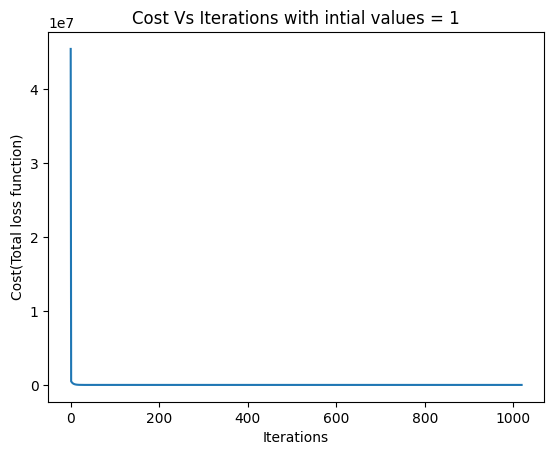

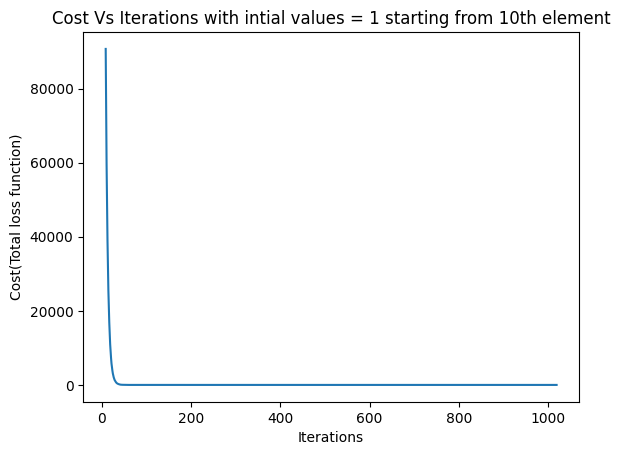

In [313]:
plt.plot(iterations,Loss_array)
plt.title("Cost Vs Iterations with intial values = 1")
plt.xlabel("Iterations")
plt.ylabel("Cost(Total loss function)")
plt.show()

plt.plot(iterations[9:],Loss_array[9:])
plt.title("Cost Vs Iterations with intial values = 1 starting from 10th element")
plt.xlabel("Iterations")
plt.ylabel("Cost(Total loss function)")
plt.show()

# Support vector Machines (SVM)

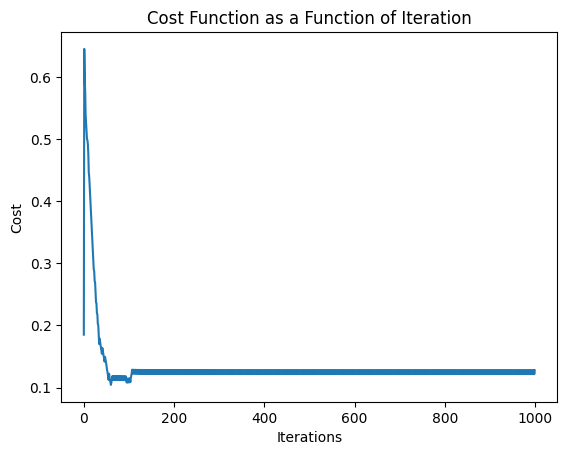

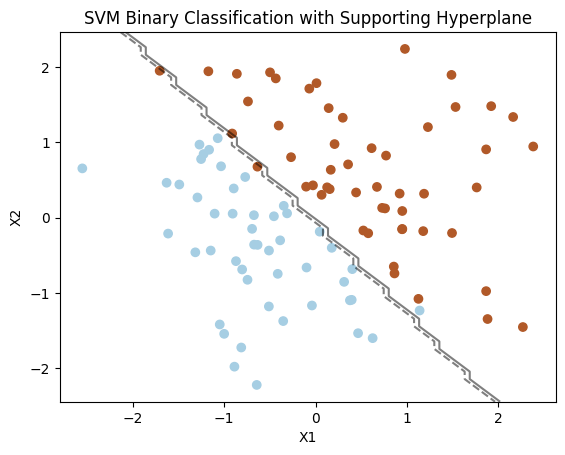

In [322]:
import numpy as np
import matplotlib.pyplot as plt

# chat GPT used #
class CustomSVM:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        costs = []

        for _ in range(self.num_iterations):
            cost = 0
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.weights) - self.bias) >= 1
                if condition:
                    self.weights -= self.learning_rate * (2 * self.lambda_param * self.weights)
                else:
                    self.weights -= self.learning_rate * (2 * self.lambda_param * self.weights - np.dot(x_i, y[idx]))
                    self.bias -= self.learning_rate * y[idx]
                    cost = 1 - y[idx] * (np.dot(x_i, self.weights) - self.bias)
            costs.append(cost)
        return costs

    def predict(self, X):
        approx = np.dot(X, self.weights) - self.bias
        return np.sign(approx)

# Generate synthetic data
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.where(X[:, 0] + X[:, 1] > 0, 1, -1)

# Train the custom SVM model
svm = CustomSVM()
costs = svm.fit(X, y)

# Plot cost function as a function of iteration
plt.plot(range(svm.num_iterations), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function as a Function of Iteration')
plt.show()

# Plot the decision boundary
def plot_decision_boundary(X, y, svm):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('SVM Binary Classification with Supporting Hyperplane')
    plt.show()

plot_decision_boundary(X, y, svm)
